## Corporate Bankruptcy Prediction: Random Forest

### 1. Imports

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipynb.fs.full.prep_datasets import pipeline_preparation
from ipynb.fs.full.feature_eng import pipeline_feature_eng
from ipynb.fs.full.feature_eng import pipeline_ranfor

# preprocessing imports
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, power_transform
from sklearn.model_selection import train_test_split

# classifier imports
from sklearn.ensemble import RandomForestClassifier

# additional imports
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.feature_selection import SelectFromModel

# performance measure imports
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


### 2. Preprocessing and feature engineering

In [2]:
# reading the data, preprocessing and feature engineering
df = pd.read_csv("final_df_dec.csv")
df, df_2016 = pipeline_preparation(df)
df, X_train, X_test, y_train, y_test = pipeline_feature_eng(df)
X_train, X_test, y_train, y_test = pipeline_ranfor(X_train, X_test, y_train, y_test)

df.head()

,oprev_turn_2016,oprev_turn_2015,oprev_turn_2014,oprev_turn_2013,oprev_turn_2012,netinc_2016,netinc_2015,netinc_2014,netinc_2013,netinc_2012,...,wc_2015,wc_2014,wc_2013,wc_2012,ebit_2016,ebit_2015,ebit_2014,ebit_2013,ebit_2012,bankrupt
0,-766.35,-7906.91,5816.03,18821.76,57891.48,-1812.06,-9470.22,868.65,7543.16,43498.62,...,0.45,0.0,0.0,0.0,-5824.87,-13714.53,-574.51,10786.05,31216.17,0
1,-38066.54,6595.85,6538.46,6033.35,-16398.63,6635.53,-117844.28,-12043.21,-65075.98,-62549.21,...,0.45,0.0,0.0,0.0,-42123.12,5689.15,5772.95,4640.32,-17129.81,0
2,-73110.61,-73994.18,-219163.04,-90426.31,-65.87,-145848.42,-141530.59,-280881.84,-203076.12,-146.32,...,0.45,0.0,0.0,0.0,-145182.90,-140783.81,-280590.36,-146308.52,-146.32,0
3,-28482.50,-32000.20,2570.26,9133.93,6622.08,-32358.51,-34233.79,118.54,5814.55,5723.77,...,0.45,0.0,0.0,0.0,-30769.77,-32322.32,2278.59,8806.28,6533.03,0
4,-2578.17,7294.13,0.01,4826.16,0.00,-40568.90,-31819.79,-37698.85,-77461.00,-11.65,...,0.45,0.0,0.0,0.0,-12652.25,-14650.90,-17555.11,-55605.31,-11.65,0


### 3. Fitting the model

According to prior analysis the following classifier are the best estimator.

In [3]:
# best classifier Random Forest
best_classifier_ranfor = (RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=12,
                       min_weight_fraction_leaf=0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False))

In [4]:
# function for fitting the model
def fit_model(best_classifier, df, X_train, y_train):
    # fit classifier
    cols = df.columns[0:-1]
    best_estim = best_classifier.fit(X_train, y_train)
    # cross validation score
    scores = cross_val_score(best_classifier, X_train, y_train, cv=5, scoring="roc_auc")
    print("CV Mean:",scores.mean())
    return best_estim

I am now fitting the best estimator with the training data. The test data was put aside. 

In [5]:
# training the data for Random Forest model
best_estim_ranfor = fit_model(best_classifier_ranfor, df, X_train, y_train)

CV Mean: 0.9203388844705817


### 4. Feature importance

In [6]:
# feature importance random forest
def feature_importance(best_estim):
    cols = df.columns[0:-1]
    feat_imp_output = pd.DataFrame({"feature":cols,
                                    "importance": best_estim.feature_importances_})
    return feat_imp_output

In [7]:
# feature importance output
feat_imp_output = feature_importance(best_estim_ranfor)
feat_imp_output.sort_values(by=["importance"], ascending=False)

,feature,importance
43,ic_2016,0.209813
83,prof/empl_2016,0.095802
118,numofempl_2014,0.076891
58,crepe_days_2016,0.067061
4,oprev_turn_2012,0.051403
116,numofempl_2016,0.048355
33,pm_2016,0.046546
6,netinc_2015,0.036750
121,sales_2016,0.028675
5,netinc_2016,0.024053


### 5. Prediction

In [8]:
# function for prediction
def prediction(best_estim, X_test, y_test):
    # train classifier and predict
    y_test_predicted = best_estim.predict(X_test)
    y_test_prob_pred = best_estim.predict_proba(X_test)[::,1]

    return y_test_predicted, y_test_prob_pred

By means of the fitted model with the best estimator, I am now predicting on the test data and I am gonna evaluate these predictions. 

In [9]:
# predicting on test data Random Forest model
y_test_predicted_ranfor, y_test_prob_pred_ranfor = prediction(best_estim_ranfor, X_test, y_test)

### 6. Performance measurement

In [10]:
# function for performance measurement
def performance_measure(y_test, y_test_predicted, y_test_prob_pred):    

    # plotting the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_test_prob_pred)
    plt.plot(fpr, tpr, c="dimgrey",label="random forest classifier")
    plt.plot([0, 1], [0, 1], c="cornflowerblue", linestyle='--', label="random guess classifier")
    plt.title("ROC Curve of Random Forest Classifier")
    plt.xlabel("False Positive Rate - Specificity")
    plt.ylabel("True Positive Rate - Sensitivity")
    plt.legend()
    plt.grid(True)
    plt.show()
        
    # AUC
    auc = round(roc_auc_score(y_test, y_test_predicted),2)
    print("AUC:",auc)
    return auc

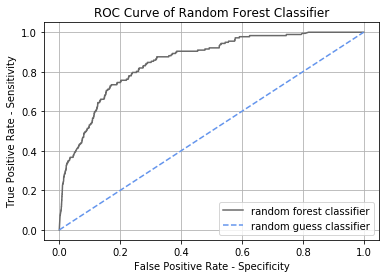

AUC: 0.77


0.77

In [11]:
# performance measure Random Forest
performance_measure(y_test, y_test_predicted_ranfor, y_test_prob_pred_ranfor)

In [12]:
# function for confusion matrix with individual decision-threshold
def confusion(y_test, y_test_prob_pred, threshold):
    
    predicted = (y_test_prob_pred >= threshold).astype('int')
    conf = confusion_matrix(y_test, predicted)
    plt.figure(figsize=(7,5))
    sns.heatmap(pd.DataFrame(conf), annot=True, cmap="Blues" ,fmt='g')
    plt.xlabel("predicted values")
    plt.ylabel("actual values")
    plt.title("Confusion Matrix for a {} decision-threshold".format(threshold))
    plt.show()
    
    TP = conf[1,1]
    TN = conf[0,0]
    FP = conf[0,1]
    FN = conf[1,0]
        
    # sensitivity/ recall_score
    print("Sensitivity:", TP/float(TP+FN)) 
       
    # specificity
    print("Specificity:", TN/float(TN+FP))

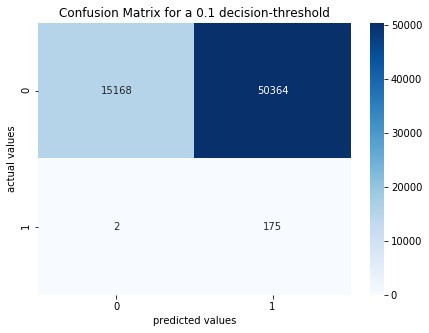

Sensitivity: 0.9887005649717514
Specificity: 0.23145943966306537


In [13]:
# confusion matrix for 0.1 decision-threshold
confusion(y_test, y_test_prob_pred_ranfor, 0.1)

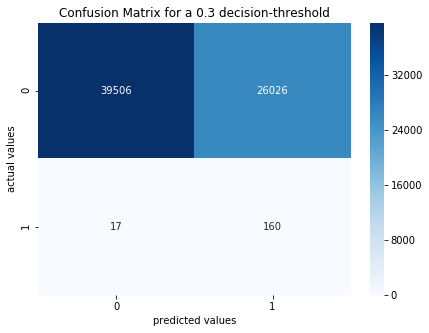

Sensitivity: 0.903954802259887
Specificity: 0.602850515778551


In [14]:
# confusion matrix for 0.3 decision-threshold
confusion(y_test, y_test_prob_pred_ranfor, 0.3)

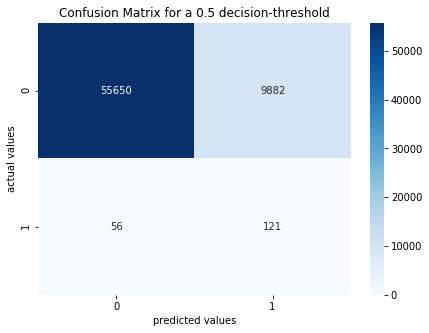

Sensitivity: 0.6836158192090396
Specificity: 0.8492034425929317


In [15]:
# confusion matrix for 0.5 decision-threshold
confusion(y_test, y_test_prob_pred_ranfor, 0.5)

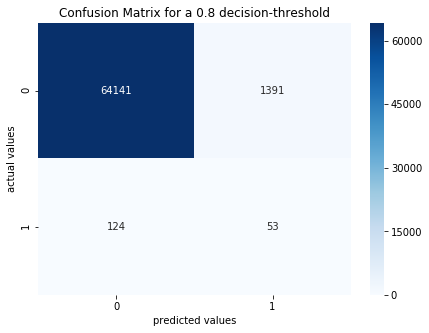

Sensitivity: 0.2994350282485876
Specificity: 0.9787737288652872


In [16]:
# confusion matrix for 0.8 decision-threshold
confusion(y_test, y_test_prob_pred_ranfor, 0.8)